In [80]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('Notebooks/Datasets/us-counties.csv')
df = data.iloc[:10000]
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [71]:
df = df.drop(columns=['fips'])
df.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0


In [72]:
print("This Covid-19 Dataset has {} data points with {} variables each.".format(*data.shape))
print("Within it, we have {} cases".format(data.cases.sum()))
print("Of those cases, we've had {} deaths.".format(data.deaths.sum()))

This Covid-19 Dataset has 301004 data points with 6 variables each.
Within it, we have 145493663 cases
Of those cases, we've had 7850907 deaths.


In [83]:
data['cases'].describe()

count    301004.000000
mean        483.361228
std        4061.961510
min           0.000000
25%           6.000000
50%          28.000000
75%         138.000000
max      221637.000000
Name: cases, dtype: float64

In [81]:
df['cases'].describe()

count    10000.000000
mean        17.802300
std        187.697706
min          0.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      12329.000000
Name: cases, dtype: float64

In [75]:
data['deaths'].describe()

count    301004.000000
mean         26.082401
std         355.438321
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max       22661.000000
Name: deaths, dtype: float64

In [82]:
df['deaths'].describe()

count    10000.000000
mean         0.289500
std          3.119401
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        155.000000
Name: deaths, dtype: float64

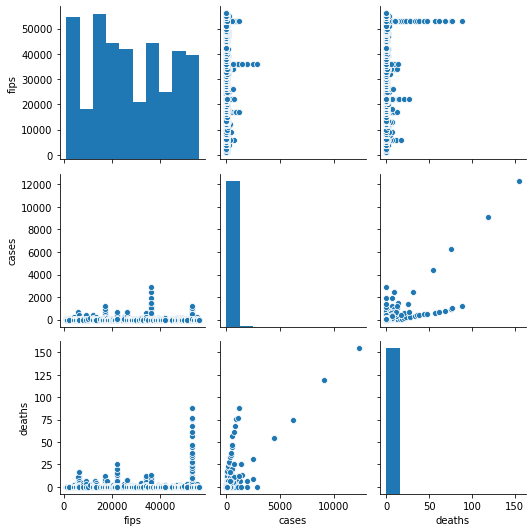

In [84]:
%matplotlib inline
sns.pairplot(df, height=2.5)
plt.tight_layout()

In [85]:
df['county'].value_counts()

Washington       142
Unknown          135
Jefferson        125
Montgomery        97
Orange            96
                ... 
St. Martin         1
Callaway           1
Chaves             1
Lac qui Parle      1
St. Francois       1
Name: county, Length: 898, dtype: int64

In [86]:
for col in df.columns:
    print(col)
    if type(df[col][0]) != np.int64:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

date
county
state
fips
cases
deaths


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [104]:
X = df.drop(columns=['deaths', 'county', 'date'])
y = df['deaths']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [106]:
#Do some Datasplicing first
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred = logreg.predict(X_test)

In [108]:
confusion_matrix(y_test, y_pred)

array([[2307,    2,    1,    1,    2,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 133,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  25,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   6,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    

In [109]:
f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.04884723091908439

In [110]:
logreg = LogisticRegression(solver="lbfgs", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[2294   12    0    0    0    4    0    0    0    2    0    0    0    0
     0    0    0    0    1    0]
 [ 133    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  23    1    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0]
 [   7    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0]
 [   1    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [94]:
logreg = LogisticRegression(solver="liblinear", multi_class="ovr")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[2309    4    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 134    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [  25    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   8    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   2    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [111]:
logreg = LogisticRegression(solver="sag", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[2294    4    4    4    4    0    0    1    0    0    0    0    0    0
     0    0    0    2    0]
 [ 130    3    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [  21    3    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0]
 [   6    1    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   2    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1    0]
 [   1    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   1    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [112]:
logreg = LogisticRegression(solver="saga", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[2294    8    4    1    4    0    0    0    0    0    0    0    0    0
     0    0    2    0]
 [ 131    2    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [  21    3    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   7    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   2    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0]
 [   1    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   1    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    1    0]
 [   0    1    0    0    0    0    0    0    0    

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [97]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)

[[ 603.44787043 -233.54504321]
 [ 603.44922669 -233.5429709 ]
 [ 603.45058294 -233.54089859]
 ...
 [-102.69851536 -198.5167447 ]
 [ -96.9965375  -280.83350919]
 [ -96.04856982 -281.66450793]]


date 0 603.447870428121 -233.54504321396004
county 1 603.4492266853357 -233.54297090035055
state 2 603.4505829425549 -233.5408985867409
fips 3 -315.1395901795142 246.6157932952531
cases 4 603.4519391997738 -233.53882627313118
deaths 5 -514.8417050236734 -153.2534396977259


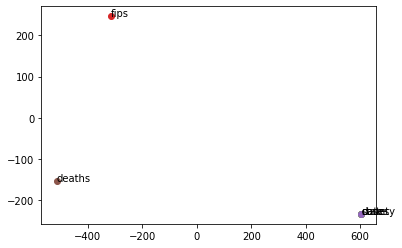

In [99]:
for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    try:
        print(df.columns[k], k, i, j)
        plt.scatter(i, j)
        plt.text(i+0.3, j, df.columns[k])
    except IndexError:
        pass

plt.show()